# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.079047e+01     6.893398e+00
 * time: 0.005496978759765625
     1     2.808960e+01     4.865927e+00
 * time: 0.025753021240234375
     2     1.843512e+01     4.324851e+00
 * time: 0.050100088119506836
     3     1.312291e+01     2.987549e+00
 * time: 0.07477998733520508
     4     1.129721e+01     2.956089e+00
 * time: 0.09454607963562012
     5     1.069601e+01     1.818851e+00
 * time: 0.1142568588256836
     6     9.613622e+00     1.327234e+00
 * time: 0.13405108451843262
     7     8.630339e+00     1.296209e+00
 * time: 0.15368008613586426
     8     8.274033e+00     9.977650e-01
 * time: 0.17349791526794434
     9     8.235771e+00     1.001641e+00
 * time: 0.18871808052062988
    10     8.180936e+00     8.742589e-01
 * time: 0.20386099815368652
    11     8.160362e+00     8.199878e-01
 * time: 0.21868896484375
    12     8.083206e+00     5.583820e-01
 * time: 0.23331403732299805
    13     8.032444e+00     5.876488e-01
 * time: 

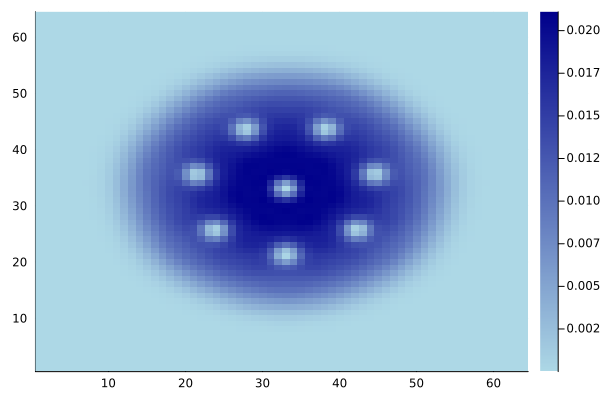

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)